In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import time
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import brentq

(a) 𝜃$_y$ shifts the activation function horizontally, while $a_y$ changes how steep the logistic curve is, as well as the midpoint's position under or over the x-axis. 

the second term's purpose is to allow the function to flip under the x-axis. 

(b)

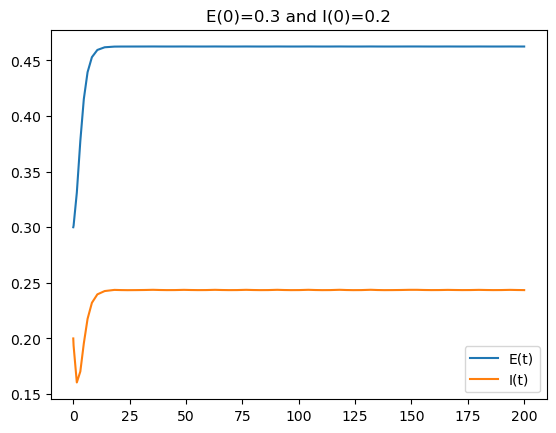

In [2]:
aE=1.2
tE=2.8
aI=1
tI=4
tau=3
r=1
wEE=12
wEI=4
wIE=13
wII=11
hE=0
hI=0
nE=0
nI=0

#bi1
E0=0.3
I0=0.2

def f(x,a,t):
    return (1/(1+np.exp(-a*(x-t))))\
    -(1/(1+np.exp(a*t)))

def system(t,y):
    E=y[0]
    I=y[1]
    dEdt=(-E+(1-r*E)*\
          f(wEE*E-wEI*I+hE+nE,aE,tE))/tau
    dIdt=(-I+(1-r*I)*\
          f(wIE*E-wII*I+hI+nI,aI,tI))/tau
    return [dEdt,dIdt]

bi1=solve_ivp(system,(0,200),[E0,I0])

plt.plot(bi1.t, bi1.y[0],label='E(t)')
plt.plot(bi1.t, bi1.y[1],label='I(t)')
plt.title('E(0)=0.3 and I(0)=0.2')
plt.legend()
plt.show()

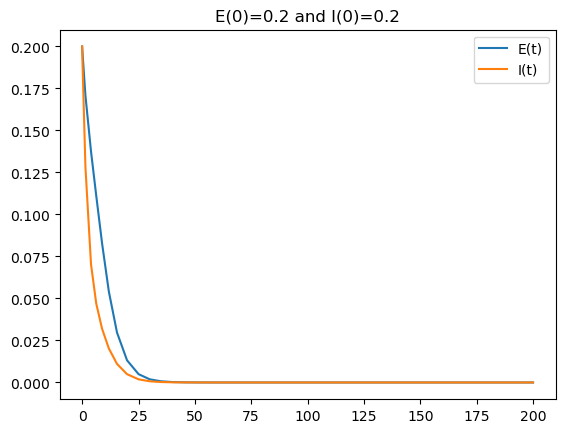

In [3]:
#bi2
E0=0.2
I0=0.2

bi2=solve_ivp(system,(0,200),[E0,I0])

plt.plot(bi2.t, bi2.y[0],label='E(t)')
plt.plot(bi2.t, bi2.y[1],label='I(t)')
plt.title('E(0)=0.2 and I(0)=0.2')
plt.legend()
plt.show()

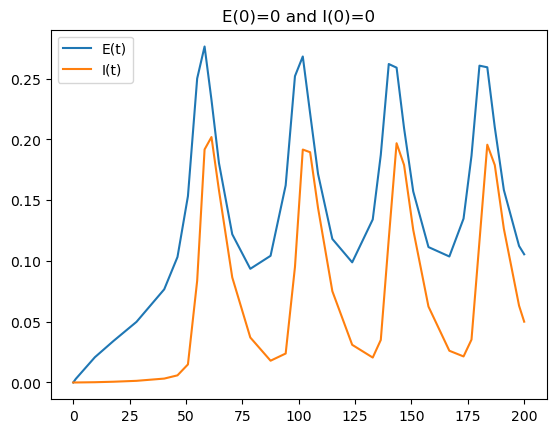

in part i, both cases reach steady state while part ii's neuronal network oscillates.
bi1: E=0.462 and I=0.243
bi2: E=-0.0 and I=-0.0


In [4]:
#bii

aE=1.3
tE=4
aI=2
tI=3.7
tau=8
r=1
wEE=16
wEI=12
wIE=15
wII=3
hE=1.25
hI=0
nE=0
nI=0

E0=0
I0=0

bii=solve_ivp(system,(0,200),[E0,I0])

plt.plot(bii.t, bii.y[0],label='E(t)')
plt.plot(bii.t, bii.y[1],label='I(t)')
plt.title('E(0)=0 and I(0)=0')
plt.legend()
plt.show()

print("in part i, both cases reach steady \
state while part ii's neuronal network oscillates.")
print(f"bi1: E={round(bi1.y[0][-1],3)} \
and I={round(bi1.y[1][-1],3)}")
print(f"bi2: E={round(bi2.y[0][-1],3)} \
and I={round(bi2.y[1][-1],3)}")

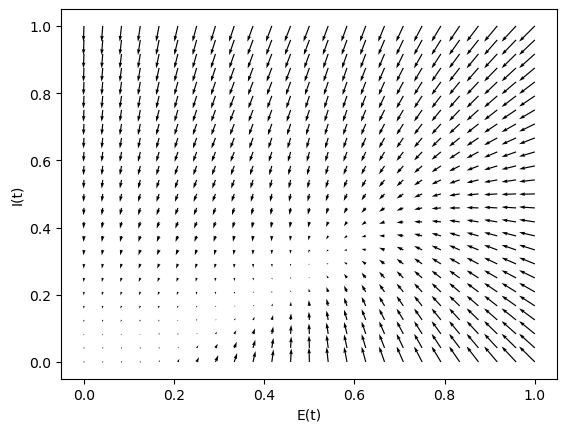

In [5]:
#ci
aE=1.2
tE=2.8
aI=1
tI=4
tau=3
r=1
wEE=12
wEI=4
wIE=13
wII=11
hE=0
hI=0
nE=0
nI=0

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

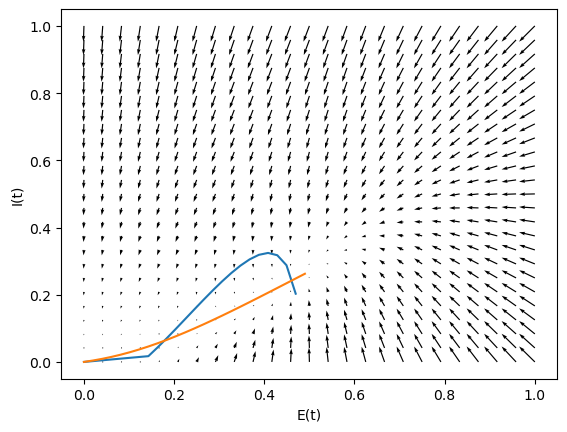

In [6]:
#cii
E=np.linspace(0,.49,25)
Es=[]
es=[]
Is=[]
es2=[]

for i in E:
    def dEdt(I):
        return (-i+(1-r*i)\
                *f(wEE*i-wEI*I+hE+nE,aE,tE))/tau
    def dIdt(I):
        return (-I+(1-r*I)\
                *f(wIE*i-wII*I+hI+nI,aI,tI))/tau
    try: 
        (brentq(dEdt,0,1))
        Es.append(brentq(dEdt,0,1))
        es.append(i)
    except:
        pass
    try: 
        (brentq(dIdt,0,1))
        Is.append(brentq(dIdt,0,1))
        es2.append(i)
    except:
        pass
plt.plot(es,Es)
plt.plot(es2,Is)

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

plt.show()

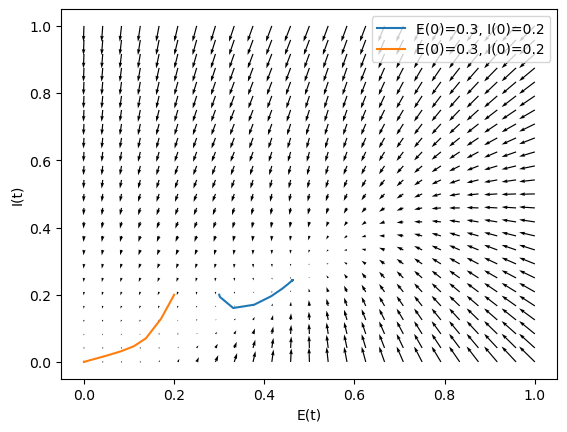

In [7]:
#ciii
E0=0.3
I0=0.2
ciii1=solve_ivp(system,(0,200),[E0,I0])
plt.plot(ciii1.y[0],ciii1.y[1],label='E(0)=0.3, I(0)=0.2')

E0=0.2
I0=0.2
ciii2=solve_ivp(system,(0,200),[E0,I0])
plt.plot(ciii2.y[0],ciii2.y[1],label='E(0)=0.3, I(0)=0.2')

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]
plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')

plt.legend()
plt.show()

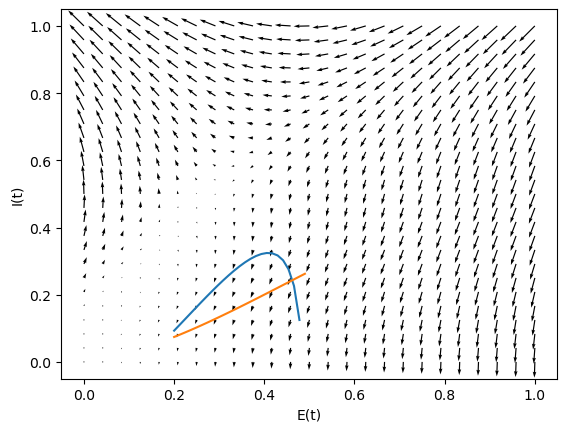

In [8]:
#ciii2
E=np.linspace(0.2,.49,25)
Es=[]
es=[]
Is=[]
es2=[]

for i in E:
    def dEdt(I):
        return (-i+(1-r*i)*f(wEE*i-wEI*I+hE+nE,aE,tE))/tau
    def dIdt(I):
        return (-I+(1-r*I)*f(wIE*i-wII*I+hI+nI,aI,tI))/tau
    try: 
        (brentq(dEdt,0,1))
        Es.append(brentq(dEdt,0,1))
        es.append(i)
    except:
        pass
    try: 
        (brentq(dIdt,0,1))
        Is.append(brentq(dIdt,0,1))
        es2.append(i)
    except:
        pass
plt.plot(es,Es)
plt.plot(es2,Is)

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-i+(1-r*i)*f(wEE*i-wEI*j+hE+nE,aE,tE))/tau)
        v.append((-j+(1-r*j)*f(wIE*i-wII*j+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

plt.show()

0.0 0.0
0.14291666666666666 0.06334982643594803
0.18375 0.06252558831026349
0.49 0.2750998562479999

 the stable fixed points are (0,0) and (.49,.275) while the unstable points are (.1429,.06335) and (.18375,.0625)


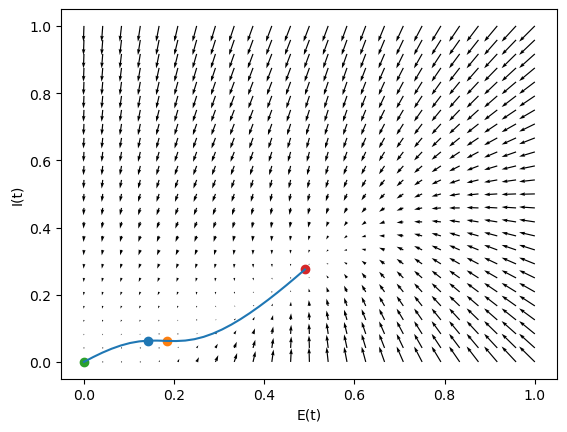

In [9]:
# the fixed points look to be about (0,0), 
# (0.175,0.025), and (0.425,0.2)
#civ
E=np.linspace(0,.49,25)
Es=[]
es=[]

for i in E:
    def dEdt(I):
        return (-i+(1-r*i)\
                *f(wEE*i-wEI*I+hE+nE,aE,tE))/tau
    def dIdt(I):
        return (-I+(1-r*I)\
                *f(wIE*i-wII*I+hI+nI,aI,tI))/tau
    def fixpt(I):
        return dEdt(I)-dIdt(I)
    try: 
        (brentq(fixpt,0,1))
        Es.append(brentq(fixpt,0,1))
        es.append(i)
    except:
        pass

print(es[0],Es[0])
dEde=np.diff(Es)/np.diff(es)
for i in range(len(dEde)-1):
    if dEde[i]*dEde[i+1] < 0:
        print(es[i],Es[i])
        plt.scatter(es[i],Es[i])
print(es[-1],Es[-1])
        
plt.plot(es,Es)
plt.scatter(es[0],Es[0])
plt.scatter(es[-1],Es[-1])

print('\n the stable fixed points are (0,0) and (.49,.275) while\
 the unstable points are (.1429,.06335) and (.18375,.0625)')

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

plt.show()


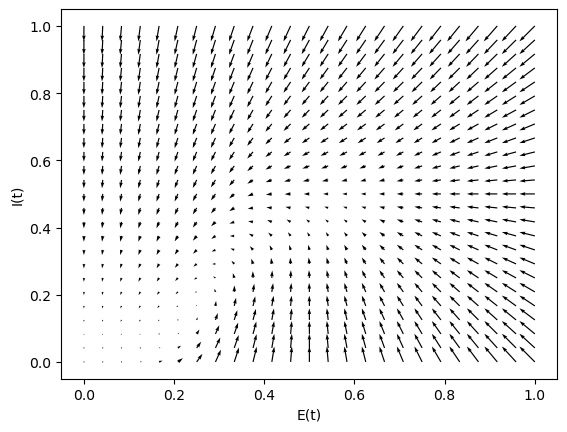

In [10]:
#di
aE=1.3
tE=4
aI=2
tI=3.7
tau=8
r=1
wEE=16
wEI=12
wIE=15
wII=3
hE=1.25
hI=0
nE=0
nI=0

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

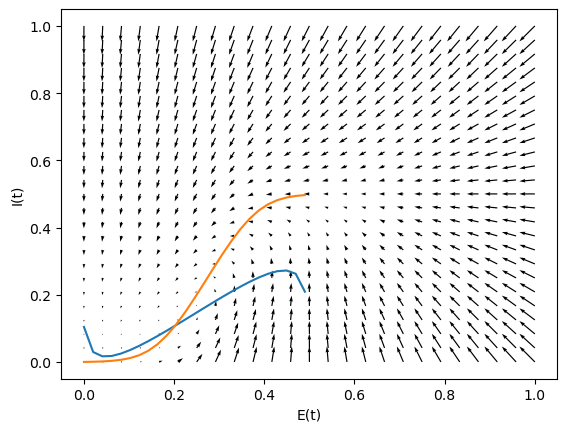

In [11]:
#dii
E=np.linspace(0,.49,25)
Es=[]
es=[]
Is=[]
es2=[]

for i in E:
    def dEdt(I):
        return (-i+(1-r*i)\
                *f(wEE*i-wEI*I+hE+nE,aE,tE))/tau
    def dIdt(I):
        return (-I+(1-r*I)\
                *f(wIE*i-wII*I+hI+nI,aI,tI))/tau
    try: 
        (brentq(dEdt,0,1))
        Es.append(brentq(dEdt,0,1))
        es.append(i)
    except:
        pass
    try: 
        (brentq(dIdt,0,1))
        Is.append(brentq(dIdt,0,1))
        es2.append(i)
    except:
        pass
plt.plot(es,Es)
plt.plot(es2,Is)

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

plt.show()

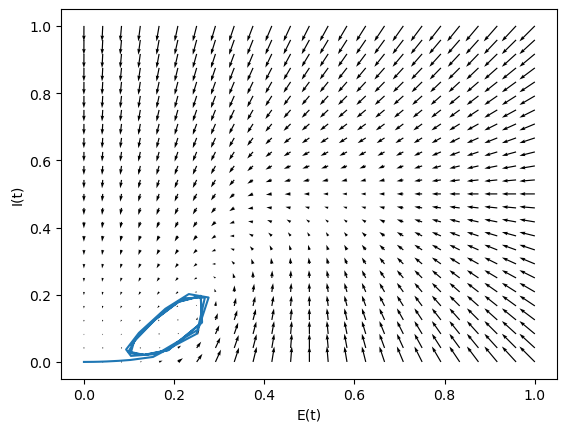

In [12]:
#diii
E0=0
I0=0
diii=solve_ivp(system,(0,200),[E0,I0])
plt.plot(diii.y[0],diii.y[1])

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]
plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')

plt.show()

0.245 0.311042443354468
0.49 0.7374005483177247

 the stable fixed points are (0,0) and (.49,.275) while the unstable points are (.1429,.06335) and (.18375,.0625)


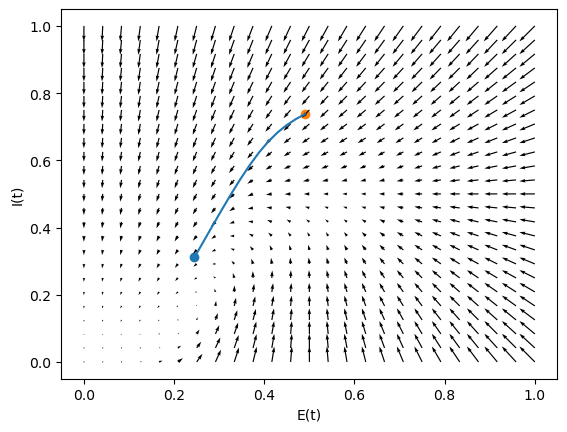

In [13]:
#div
E=np.linspace(0,.49,25)
Es=[]
es=[]

for i in E:
    def dEdt(I):
        return (-i+(1-r*i)\
                *f(wEE*i-wEI*I+hE+nE,aE,tE))/tau
    def dIdt(I):
        return (-I+(1-r*I)\
                *f(wIE*i-wII*I+hI+nI,aI,tI))/tau
    def fixpt(I):
        return dIdt(I)-dEdt(I)
    try: 
        (brentq(fixpt,0,1))
        Es.append(brentq(fixpt,0,1))
        es.append(i)
    except:
        pass

print(es[0],Es[0])
dEde=np.diff(Es)/np.diff(es)
for i in range(len(dEde)-1):
    if dEde[i]*dEde[i+1] < 0:
        print(es[i],Es[i])
        plt.scatter(es[i],Es[i])
print(es[-1],Es[-1])
        
plt.plot(es,Es)
plt.scatter(es[0],Es[0])
plt.scatter(es[-1],Es[-1])

print('\n the only fixed points are stable and (.245,.311) and (.49,.737)')

E=np.linspace(0,1,25)
I=np.linspace(0,1,25)
U=[]
V=[]
u=[]
v=[]
for i in E:
    for j in I:
        u.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+nE,aE,tE))/tau)
        v.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+nI,aI,tI))/tau)
    U.append(u)
    V.append(v)
    u=[]
    v=[]

plt.quiver(E,I,U,V)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.show()

plt.show()

I noticed...

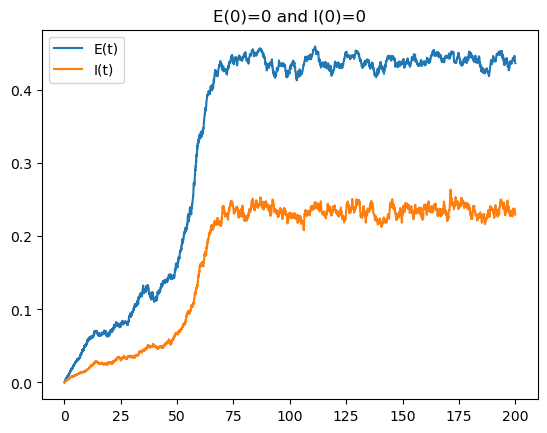

overall, E and I are similar, they stabilize at similar points to bi (~.45 for E and ~.25 for I), the main difference in the dynamics is at the beginning of the evolution 
 
 there is definately some variance between runs, but it is mainly at earlier times, and E and I tend to stabilize before 100ms.


In [14]:
#ei
aE=1.2
tE=2.8
aI=1
tI=4
tau=3
r=1
wEE=12
wEI=4
wIE=13
wII=11
hE=0
hI=0
s=np.random.standard_normal(8000)
E0=0
I0=0

def system(t,y):
    E=y[0]
    I=y[1]
    dEdt=(-E+(1-r*E)*\
          f(wEE*E-wEI*I+hE+np.random.choice(s),aE,tE))/tau
    dIdt=(-I+(1-r*I)*\
          f(wIE*E-wII*I+hI+np.random.choice(s),aI,tI))/tau
    return [dEdt,dIdt]

ei=solve_ivp(system,(0,200),[E0,I0])
plt.plot(ei.t, ei.y[0],label='E(t)')
plt.plot(ei.t, ei.y[1],label='I(t)')
plt.title('E(0)=0 and I(0)=0')
plt.legend()
plt.show()

print('overall, E and I are similar, they stabilize at similar points\
 to bi (~.45 for E and ~.25 for I), the main difference in the dynamics\
 is at the beginning of the evolution \n \n there is definately some\
 variance between runs, but it is mainly at earlier times, and E and I\
 tend to stabilize before 100ms.')

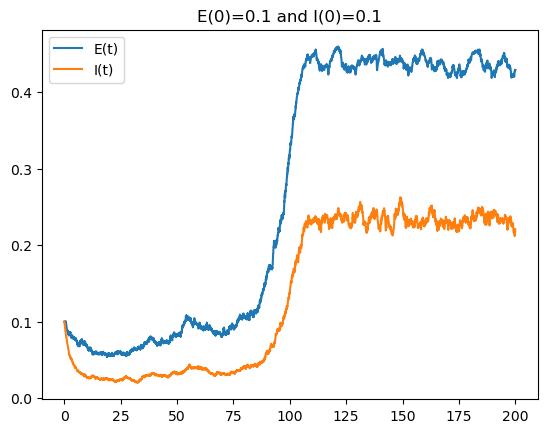

In [15]:
#eii
aE=1.2
tE=2.8
aI=1
tI=4
tau=3
r=1
wEE=12
wEI=4
wIE=13
wII=11
hE=0
hI=0
s=np.random.standard_normal(8000)
E0=0.1
I0=0.1

def system(t,y):
    E=y[0]
    I=y[1]
    dEdt=(-E+(1-r*E)*\
          f(wEE*E-wEI*I+hE+np.random.choice(s),aE,tE))/tau
    dIdt=(-I+(1-r*I)*\
          f(wIE*E-wII*I+hI+np.random.choice(s),aI,tI))/tau
    return [dEdt,dIdt]

eii=solve_ivp(system,(0,200),[E0,I0])
plt.plot(eii.t, eii.y[0],label='E(t)')
plt.plot(eii.t, eii.y[1],label='I(t)')
plt.title('E(0)=0.1 and I(0)=0.1')
plt.legend()
plt.show()

Eq=np.linspace(0,1,25)
Iq=np.linspace(0,1,25)
Uq=[]
Vq=[]
uq=[]
vq=[]
for i in Eq:
    for j in Iq:
        uq.append((-j+(1-r*j)\
                  *f(wEE*j-wEI*i+hE+np.random.choice(s),aE,tE))/tau)
        vq.append((-i+(1-r*i)\
                  *f(wIE*j-wII*i+hI+np.random.choice(s),aI,tI))/tau)
    Uq.append(uq)
    Vq.append(vq)
    uq=[]
    vq=[]

#### eiii
the system is converging to a specific state, which will be a fixed point.

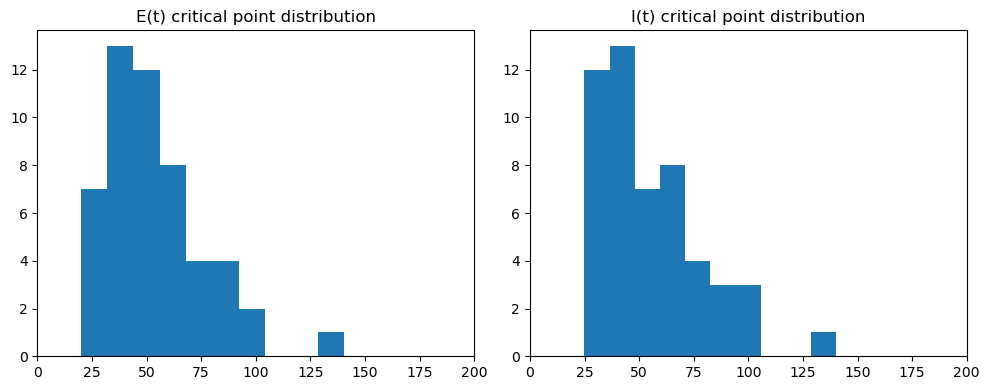

the distibutions are similar, which makes sense as in my observations, E(t) would hit its equilibrium a few ms after I(t).


In [16]:
#eiv
timesE=[]
tEs=[]
timesI=[]
tIs=[]
ptE=[]
ptI=[]
for j in range(0,50):
    aE=1.2
    tE=2.8
    aI=1
    tI=4
    tau=3
    r=1
    wEE=12
    wEI=4
    wIE=13
    wII=11
    hE=0
    hI=0
    s=np.random.standard_normal(8000)
    def system(t,y):
        E=y[0]
        I=y[1]
        dEdt=(-E+(1-r*E)*f(wEE*E-wEI*I+hE+np.random.choice(s),aE,tE))/tau
        dIdt=(-I+(1-r*I)*f(wIE*E-wII*I+hI+np.random.choice(s),aI,tI))/tau
        return [dEdt,dIdt]
    eiii=solve_ivp(system,(0,200),[0.1,0.1])
    
    E=np.diff(eiii.y[0])/np.diff(eiii.t)
    critE=E[0]
    tE=0
    for i in range(1,len(E)):
        if E[i] > critE:
            if (eiii.y[0][i]-eiii.y[0][tE]) > 0.1:
                critE=E[i]
                tE=i
    timesE.append(eiii.t[tE])
    tEs.append(tE)
    ptE.append(eiii.y[0][tE])
    
    I=np.diff(eiii.y[1])/np.diff(eiii.t)
    critI=I[0]
    tI=0
    for i in range(1,len(I)):
        if I[i] > critI:
            if (eiii.y[1][i]-eiii.y[1][tI]) > 0.1:
                critI=I[i]
                tI=i
    timesI.append(eiii.t[tI])
    tIs.append(tI)
    ptI.append(eiii.y[1][tI])

    
    
E=np.diff(eii.y[0])/np.diff(eii.t)
critE=E[0]
tE=0
for i in range(1,len(E)):
    if E[i] > critE:
        if (eii.y[0][i]-eii.y[0][tE]) > 0.1:
            critE=E[i]
            tE=i
timesE.append(eii.t[tE])

I=np.diff(eii.y[1])/np.diff(eii.t)
critI=I[0]
tI=0
for i in range(1,len(I)):
    if I[i] > critI:
        if (eii.y[1][i]-eii.y[1][tI]) > 0.1:
            critI=I[i]
            tI=i
timesI.append(eii.t[tI])

fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(1,2)
Et = fig.add_subplot(gs[0, 0])
It = fig.add_subplot(gs[0, 1])
fig.tight_layout()

Et.hist(timesE)
Et.set_xlim([0,200])
Et.set_title('E(t) critical point distribution')
It.hist(timesI)
It.set_xlim([0,200])
It.set_title('I(t) critical point distribution')

plt.tight_layout()
plt.show()

print('the distibutions are similar, which makes sense as in my \
observations, E(t) would hit its equilibrium a few ms after I(t).')

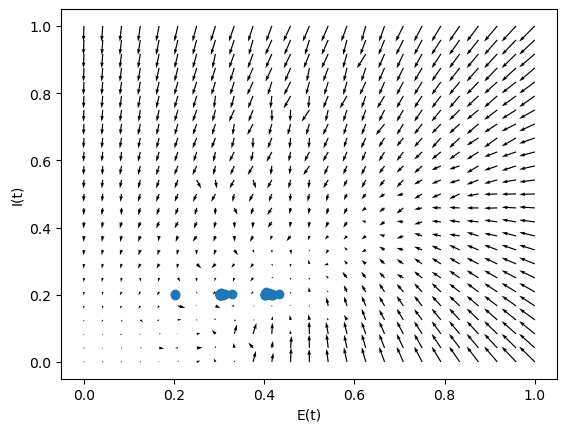

one could approximate where these points would be as they tendto be near where the space diagram converges, but it is not completlyvisually obvious


In [17]:
#ev
plt.quiver(Eq,Iq,Uq,Vq)
plt.xlabel('E(t)')
plt.ylabel('I(t)')
plt.scatter(ptE,ptI)
plt.show()
print('one could approximate where these points would be as they tend\
to be near where the space diagram converges, but it is not completly\
visually obvious')

i expect the equilibrium to be reached faster with less standard deviation when n_e and n_i are zero it takes less than 25ms


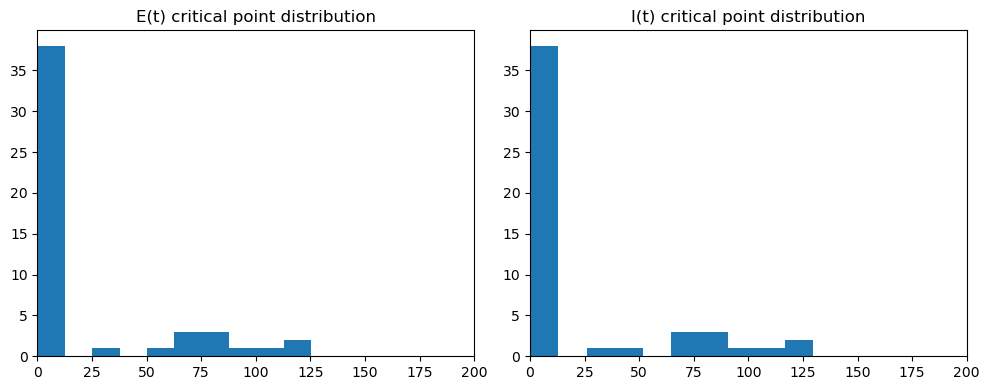

my expectation is true when the equilibrium is reached, as the histogram is more left-heavy, the smaller standard deviation leads to many more quick equilibriums


In [34]:
#evi
print('i expect the equilibrium to be reached faster with less standard\
 deviation when n_e and n_i are zero it takes less than 25ms')

import random
timesE=[]
tEs=[]
timesI=[]
tIs=[]
ptE=[]
ptI=[]
for j in range(0,50):
    aE=1.2
    tE=2.8
    aI=1
    tI=4
    tau=3
    r=1
    wEE=12
    wEI=4
    wIE=13
    wII=11
    s=np.random.normal(loc=0.0,scale=0.9,size=8000)
    hE=0
    hI=0
    def system(t,y):
        E=y[0]
        I=y[1]
        dEdt=(-E+(1-r*E)*f(wEE*E-wEI*I+hE+np.random.choice(s),aE,tE))/tau
        dIdt=(-I+(1-r*I)*f(wIE*E-wII*I+hI+np.random.choice(s),aI,tI))/tau
        return [dEdt,dIdt]
    evi=solve_ivp(system,(0,200),[0.1,0.1])
    
    E=np.diff(evi.y[0])/np.diff(evi.t)
    critE=E[0]
    tE=0
    for i in range(1,len(E)):
        if E[i] > critE:
            if (evi.y[0][i]-evi.y[0][tE]) > 0.1:
                critE=E[i]
                tE=i
    timesE.append(evi.t[tE])
    tEs.append(tE)
    ptE.append(evi.y[0][tE])
    
    I=np.diff(evi.y[1])/np.diff(evi.t)
    critI=I[0]
    tI=0
    for i in range(1,len(I)):
        if I[i] > critI:
            if (evi.y[1][i]-evi.y[1][tI]) > 0.1:
                critI=I[i]
                tI=i
    timesI.append(evi.t[tI])
    tIs.append(tI)
    ptI.append(evi.y[1][tI])

fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(1,2)
Et = fig.add_subplot(gs[0, 0])
It = fig.add_subplot(gs[0, 1])
fig.tight_layout()

Et.hist(timesE)
Et.set_xlim([0,200])
Et.set_title('E(t) critical point distribution')
It.hist(timesI)
It.set_xlim([0,200])
It.set_title('I(t) critical point distribution')

plt.tight_layout()
plt.show()

print('my expectation is true when the equilibrium is reached, as the \
histogram is more left-heavy, the smaller standard deviation leads to \
many more quick equilibriums')